1: Preparation of a data quality report

Importing the CSV Data

We will be importing the COVID-19 csv data file in order to perform a data quality analysis on it and get a deeper understanding as to what is contained in this dataset

In [2]:
# Import package for reading csv files
import pandas as pd

# Reading from a csv file, into a data frame
df = pd.read_csv('covid19-cdc-22208922.csv')

# Displaying the amount of rows and columns in the data frame
row_and_columns = df.shape
row_count = row_and_columns[0]
column_count = row_and_columns[1]

print("Row Count:", row_count)
print("Column Count:", column_count)

Row Count: 20000
Column Count: 19


Showing the first 5 rows and the last 5 rows of the data frame

In [3]:
# Showing the first 5 rows 
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-06,TX,48.0,DALLAS,48113.0,65+ years,Female,White,Unknown,NaN,NaN,Missing,Missing,Probable Case,Missing,Yes,Missing,Yes,NaN
1,2020-10,WI,55.0,MILWAUKEE,55079.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes,NaN
2,2021-08,TX,48.0,MONTGOMERY,48339.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Unknown,Missing,Yes,NaN
3,2022-01,NJ,34.0,HUDSON,34017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,Yes,NaN
4,2020-12,CA,6.0,RIVERSIDE,6065.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Missing,Yes,NaN


In [4]:
# Showing the last 5 rows
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19995,2022-02,MN,27.0,POLK,27119.0,0 - 17 years,Female,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19996,2022-11,OH,39.0,FRANKLIN,39049.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19997,2021-10,MI,26.0,WAYNE,26163.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,NaN
19998,2021-09,IN,18.0,ALLEN,18003.0,50 to 64 years,Female,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19999,2020-11,MD,24.0,PRINCE GEORGE'S,24033.0,50 to 64 years,Male,White,Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


Let's have a look at the data type in each column

int64 and float64 are numeric columns

object are string columns

In [5]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

We will now change data type appropriately to be either continuous or categorical

In [6]:
df['case_month'] = df['case_month'].astype('category')
df['res_state'] = df['res_state'].astype('category')
df['state_fips_code'] = df['state_fips_code'].astype('int64')
df['res_county'] = df['res_county'].astype('category')
df['age_group'] = df['age_group'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['ethnicity'] = df['ethnicity'].astype('category')
df['process'] = df['process'].astype('category')
df['exposure_yn'] = df['exposure_yn'].astype('category')
df['current_status'] = df['current_status'].astype('category')
df['symptom_status'] = df['symptom_status'].astype('category')
df['hosp_yn'] = df['hosp_yn'].astype('category')
df['icu_yn'] = df['icu_yn'].astype('category')
df['death_yn'] = df['death_yn'].astype('category')
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].astype('category')


In [7]:
df.dtypes

case_month                         category
res_state                          category
state_fips_code                       int64
res_county                         category
county_fips_code                    float64
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

We will now look for duplicate columns/rows, and drop them if deemed necessary.

In the project brief, the following is outlined to us as the main purpose of our data analytics research

"In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction"
 
We will have a look at the rows first to see which columns would not contribute to a potential prediction of risk of death.

First we will have a look at key indicators that would potentially give us a reason to predict someones risk of death:

1. age_group
2. sex
3. exposure_yn
4. current_status
5. symptom_status
6. hosp_yn
7. icu_yn
8. death_yn
9. underlying_conditions_yn
10. race
11. ethnicity
12. process
13. case_positive_specimen_interval
14. case_onset_interval
15. case_month

I have decided to keep the above 14 columns as they relate to the patient directly, and relate to the process by which they have/haven't been diagnosed, and the medical history relating to whether they have had medical treatment or underlying conditions. I have decided to include race/ethnicity due to the fact that there may be trends in specific ethnicities regarding how they have fought the illness. 


Now we will consider some of the columns that would not be useful when identifying the risk of death

1. res_state
2. state_fips_code
3. res_county
4. county_fips_code

I have decided to drop the above 4 columns as the patient's residence information is not indicative of their risk of death. One could make the argument that living in densly populated environments may increase a patient's liklihood of death, with other illnesses being spread and contributing to a patients death, but for the purpose of this analysis I would like to focus solely on the patient's case in a vacuum.

As it pertains to duplicate rows, we can see the amount of duplicate rows in our dataset with the following command

In [8]:
print("Duplicate remaining rows:", df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 1917


We can see that there are 1,917 rows in our dataset that are duplicates, but we must understand what this represents. This means that there are quite a few records in which all patient information is the same for each attribute.

We must consider whether it makes sense to drop these rows. Is it possible for a patient record to match that of another. Yes. Does this mean that we can remove this piece of data from the dataset. No. 

It would be foolish to remove a row due to the fact that they share characteristics with another patient. Removing valuable information from the dataset would have no benefit as we could be intentionally missing out on some important information. Perhaps there is a trend of peolple from a certain age brackets with certain underlying illnesses that could indicate they are more at risk of death from COVID. Discounting any entry because they share identical attributes would be bad data analytical practise. 

Now let's have a look at duplicate columns to see whether we can drop them or not. 

In [9]:
print("Duplicate remaining columns:", df[df.duplicated(keep=False)].shape[1])

Duplicate remaining columns: 19


I'm not too sure what to make of the above so we will leave it for the moment, whether I choose to leave this in is another question!!!!!!!!!!!!!!!!!!!!!!

Let's go ahead and drop the columns that we don't deem necessary for this investigation which we have outline above to be the following:

1. res_state
2. state_fips_code
3. res_county
4. county_fips_code

We can do this with the following piece of code

In [10]:
df.drop(['res_state', 'state_fips_code', 'res_county', 'county_fips_code'], axis=1)
dropped_df = df.drop(['res_state', 'state_fips_code', 'res_county', 'county_fips_code'], axis=1)

We can see from the above that the 4 columns that we don't need are now no longer part of the dataframe

We can now export this dataframe to a new csv which we will name something appropriate to outline that this is the 'cleaned' CSV file. This will be the file that we will perform our calculations on

As the '.drop' method does not alter the orginal dataframe, we create a new dataframe which will contain the original dataframe but with the 4 columns we want to remove being dropped

In [11]:
dropped_df.dtypes


case_month                         category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

In [12]:
dropped_df.to_csv('covid19-cdc-22208922_cleaned.csv', index=False)

We can now read this new CSV file into a new dataframe to make things easier for us to manipulate the data

First let's assign it to a new dataframe 

In [13]:
df_clean = pd.read_csv('covid19-cdc-22208922_cleaned.csv')

Let us now look at the descriptive statistics for the continuous features with the following command

In [14]:
df_clean.describe()

,case_positive_specimen_interval,case_onset_interval
count,10444.000000,8664.000000
mean,0.168614,-0.062211
std,1.839642,1.754185
min,-63.000000,-58.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,67.000000,50.000000


In order for us to get the descriptive statictics on categorical data, we need to use the following command

In [15]:
df_clean.dtypes

case_month                          object
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Looks like we need to change all the object data types back to how we outlined in the starting dataset

In [16]:
df_clean['case_month'] = df_clean['case_month'].astype('category')
df_clean['age_group'] = df_clean['age_group'].astype('category')
df_clean['sex'] = df_clean['sex'].astype('category')
df_clean['race'] = df_clean['race'].astype('category')
df_clean['ethnicity'] = df_clean['ethnicity'].astype('category')
df_clean['process'] = df_clean['process'].astype('category')
df_clean['exposure_yn'] = df_clean['exposure_yn'].astype('category')
df_clean['current_status'] = df_clean['current_status'].astype('category')
df_clean['symptom_status'] = df_clean['symptom_status'].astype('category')
df_clean['hosp_yn'] = df_clean['hosp_yn'].astype('category')
df_clean['icu_yn'] = df_clean['icu_yn'].astype('category')
df_clean['death_yn'] = df_clean['death_yn'].astype('category')
df_clean['underlying_conditions_yn'] = df_clean['underlying_conditions_yn'].astype('category')


Now we can run the following command to get the descriptive statistics for all the categorical features

In [17]:
df_clean.describe(include='category')

,case_month,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
count,20000,19872,19600,17677,17494,20000,20000,20000,20000,20000,20000,20000,1727
unique,35,5,5,8,4,9,3,2,4,4,4,2,2
top,2022-01,18 to 49 years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
freq,2614,7656,10156,12436,12046,18248,17287,17138,9108,9826,15593,15000,1705


Now let's plot a histogram for all continuous features

Just to recap, these are all the continuous features in our dataframe

           
case_positive_specimen_interval    
case_onset_interval                


<AxesSubplot: >

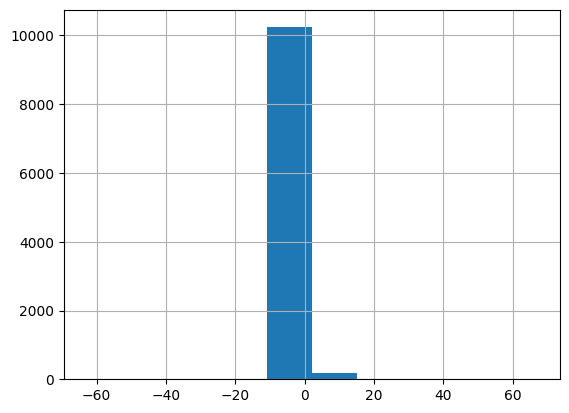

In [18]:
df_clean['case_positive_specimen_interval'].hist()

<AxesSubplot: >

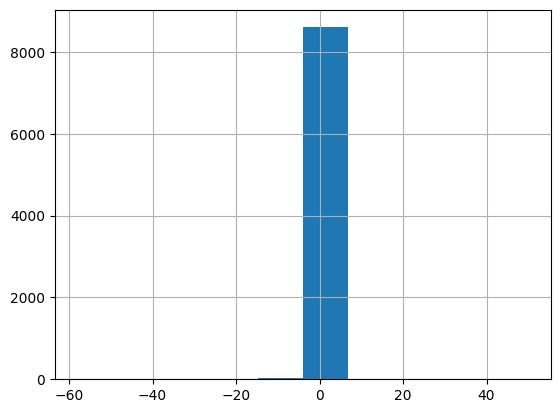

In [19]:
df_clean['case_onset_interval'].hist()

Now we will plot box plots for all the continuous features

<AxesSubplot: >

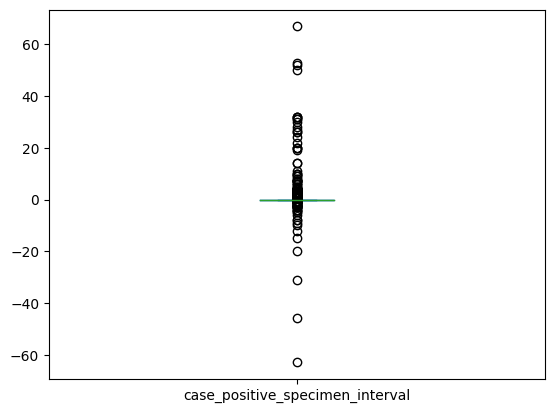

In [20]:
df_clean['case_positive_specimen_interval'].plot(kind='box')

<AxesSubplot: >

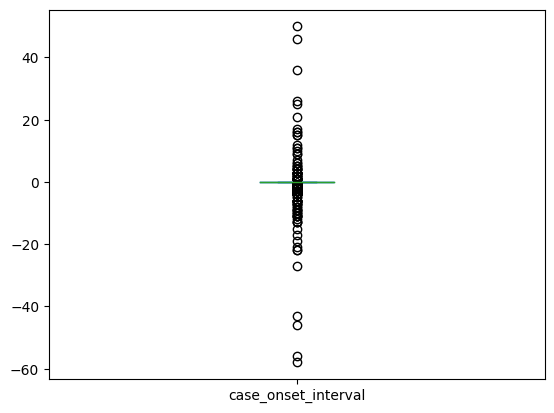

In [21]:
df_clean['case_onset_interval'].plot(kind='box')

Now we will plot some bar plots for all the categorical features, which are the following

case_month                          
age_group                           
sex                                 
race                                
ethnicity                           
process                             
exposure_yn                         
current_status                      
symptom_status                      
hosp_yn                             
icu_yn                              
death_yn                            
underlying_conditions_yn            

<AxesSubplot: >

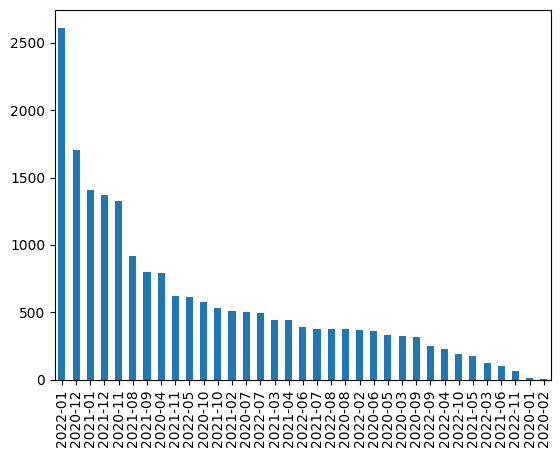

In [22]:
df_clean['case_month'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

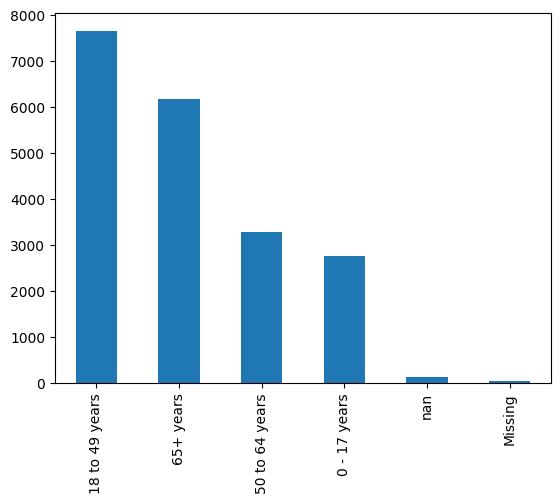

In [23]:
df_clean['age_group'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

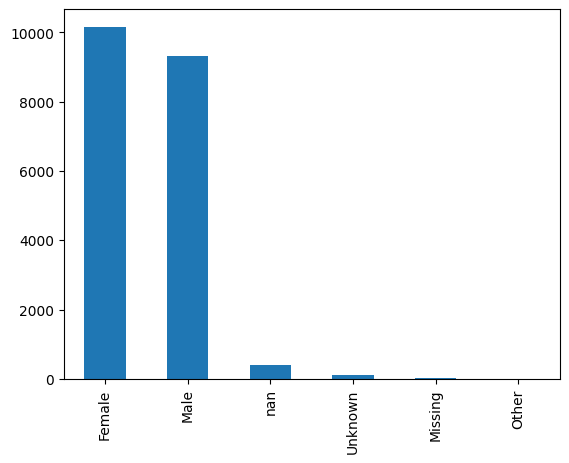

In [24]:
df_clean['sex'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

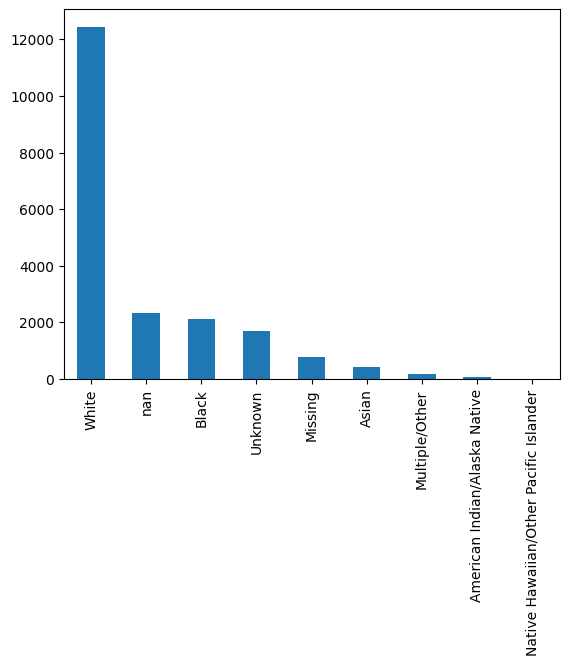

In [25]:
df_clean['race'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

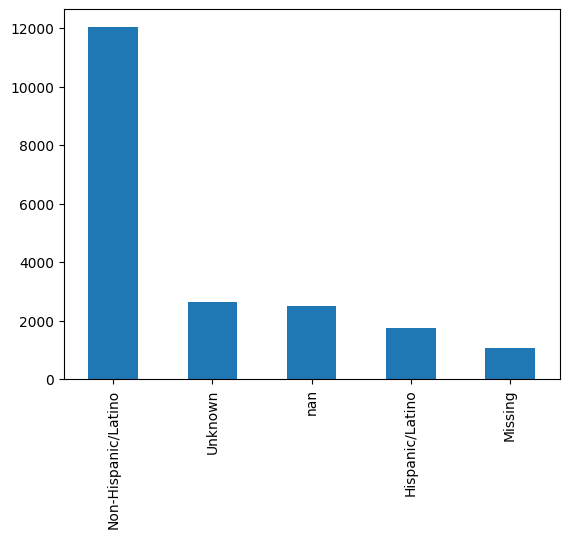

In [26]:
df_clean['ethnicity'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

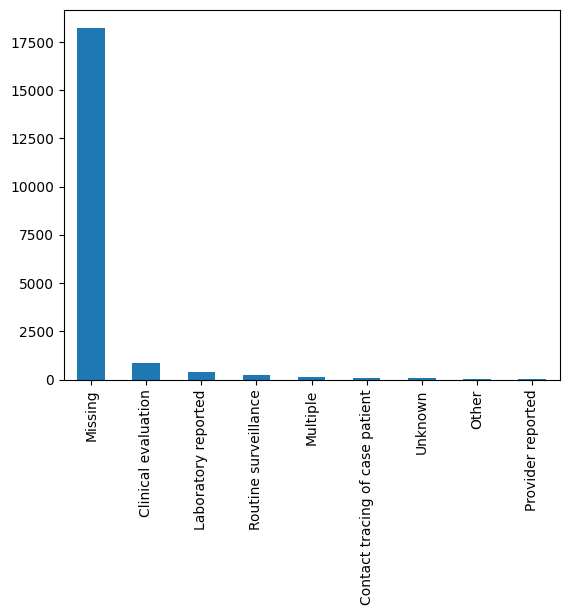

In [27]:
df_clean['process'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

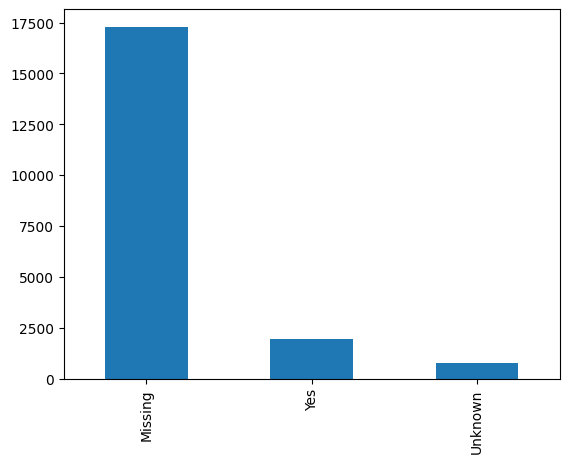

In [28]:
df_clean['exposure_yn'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

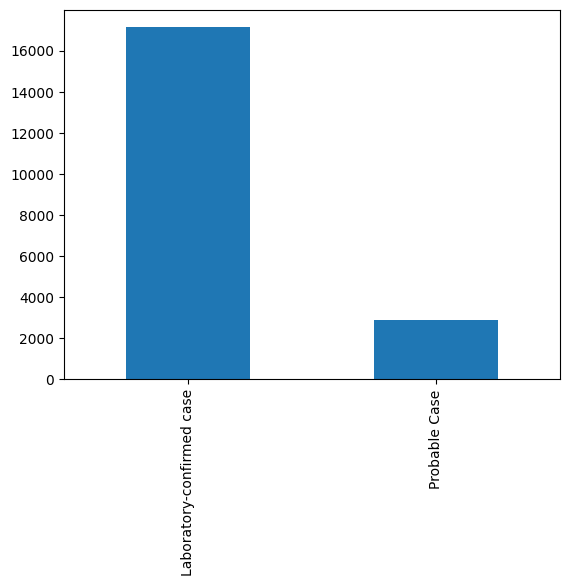

In [29]:
df_clean['current_status'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

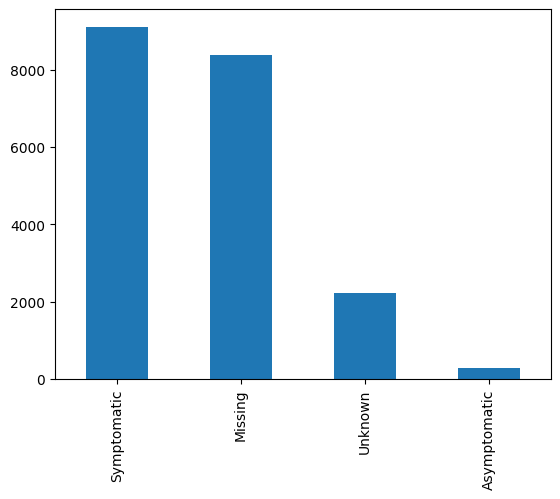

In [30]:
df_clean['symptom_status'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

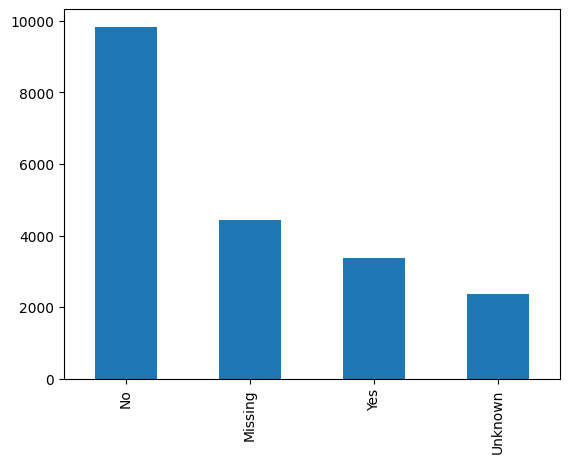

In [31]:
df_clean['hosp_yn'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

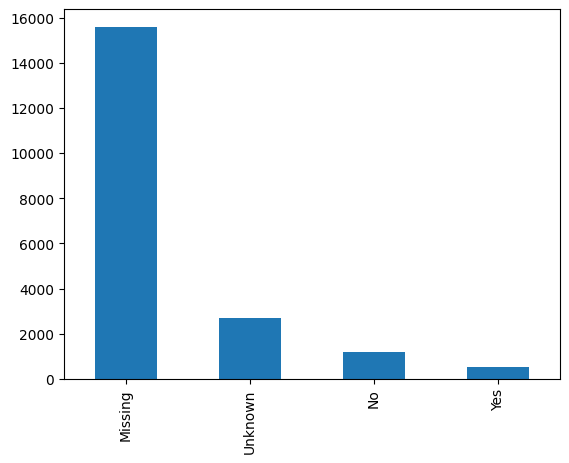

In [32]:
df_clean['icu_yn'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

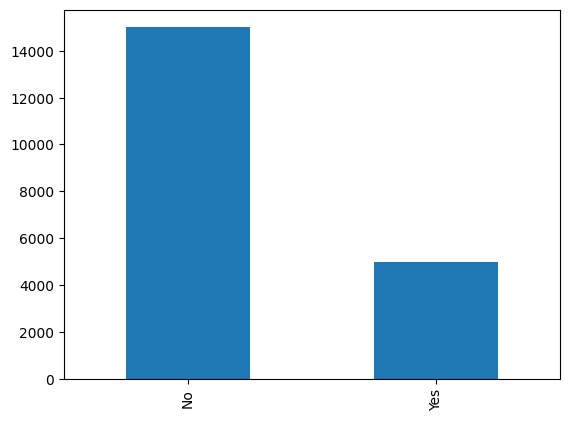

In [33]:
df_clean['death_yn'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

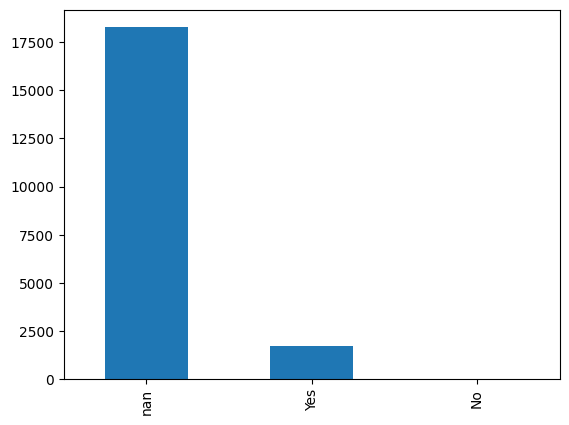

In [34]:
df_clean['underlying_conditions_yn'].value_counts(dropna = False).plot(kind='bar')

Now we will have a look at some of the continuous features

<AxesSubplot: >

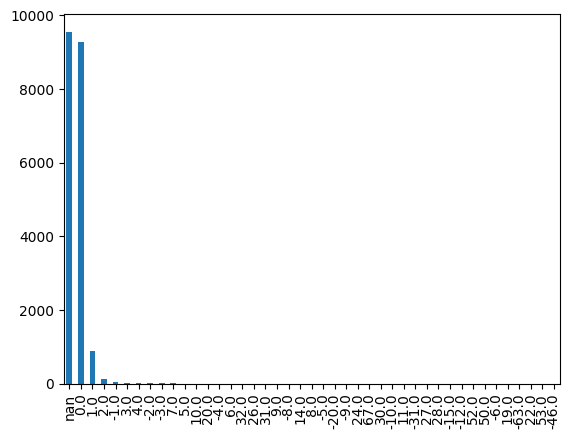

In [35]:
df_clean['case_positive_specimen_interval'].value_counts(dropna = False).plot(kind='bar')

<AxesSubplot: >

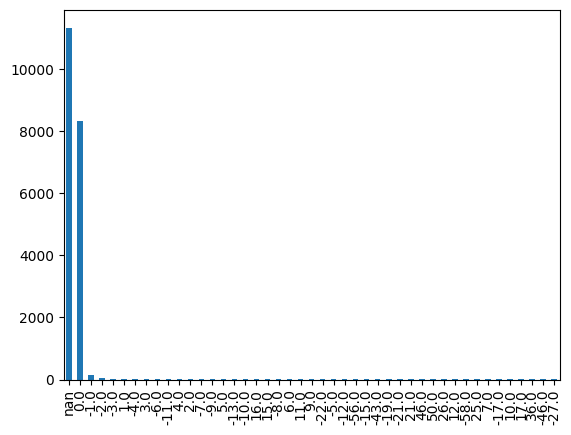

In [36]:
df_clean['case_onset_interval'].value_counts(dropna = False).plot(kind='bar')